In this work, we'll switch our focus to the individual values in a distribution and learn a few statistical techniques that can help us answer practical questions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

houses = pd.read_table("AmesHousing_1.txt")
houses[0:2]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,131770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000


In [2]:
# Sample randomly one sale price from the SalePrice column
print(houses['SalePrice'].sample(1, random_state = 0))

2216    220000
Name: SalePrice, dtype: int64


We can see we got a price of `$220,000`. 
* Is a house costing `$220,000` **cheap**, **expensive**, or **average-priced**? 

To answer this question, we can start with finding the mean price of a house and then figure out whether `$220,000` is below or above the mean

In [3]:
mean = houses['SalePrice'].mean()
mean

180796.0600682594

The sampled house (`$220,000`) is clearly more expensive than the average house (roughly $180,796), but is this price slightly above the average or extremely above the average? The answer depends on the standard deviation of the distribution of sale prices.

In [4]:
std = houses['SalePrice'].std()
std

79886.69235666493

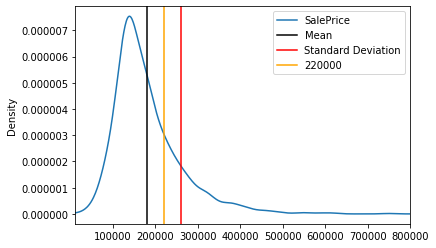

In [5]:
# Generate a kernel density plot for the SalePrice variable to find out how far off $220,000 is from the mean.
# Plot a vertical line to indicate visually the standard deviation distance above the mean

houses['SalePrice'].plot.kde()
plt.xlim(12000,800000)
plt.axvline(houses['SalePrice'].mean(), label = "Mean", color = "Black")
plt.axvline(mean + std, label = "Standard Deviation", color = "red") # data is a population so standard deviation without Bessel's correction
plt.axvline(220000, color = "Orange", label = "220000")
plt.legend()


For the sample a with `standard deviation (s = 79886.70 )`, we can see that `$220,000` is fairly close to the mean, indicating that houses at that price are common and thus not very expensive (relative to the other houses on the market).

We need to find a faster and more precise way to measure how far off a value is from the mean (taking into account at the same time the standard deviation of the distribution).

In [6]:
# Find out the number of standard deviations away from the mean for a price

st_devs_away = (220000-mean)/std
st_devs_away

0.4907443126661111

We could say that `$220,000` is `0.49` or **approx half of standard deviation** away from the mean. * We can conclude that this value `($220000)` is relatively close to the mean, and it's not very expensive compared to the other prices in the distribution.

Let's try to describe this process algebraically: for any value **x** in a population with mean **μ** and  standard deviation **б** , 

* the number of standard deviations away from the mean is given by the formula below, where we denote the number of standard deviations away from the mean with **z** `z=(x-μ)/б`

The value representing the number of standard deviations away from the mean is commonly known as the **standard score, or the z-score**

Z-scores can also be defined fairly easy for samples. For any value in a sample with mean and standard deviation (with Bessel's correction), the z-score 

$$z = (x - x¯)/s$$

The z-scores we've dealt with so far were all positive, but we can have negative z-scores as well.

We can see that a z-score has two parts:

* The sign, which indicates whether the value is above or below the mean.
* The value, which indicates the number of standard deviations that a value is away from the mean.

Generally, the sign of a z-score is written out even if the z-score is positive. 
* If a value is two standard deviations away from the mean, we should write that the z-score is +2, not 2.

In [7]:
# Function that returns the z

def z_score(value,series, bessel = 0):
    std = series.std(ddof = bessel)
    mean = series.mean()
    z = (value - mean)/std
    return z


In [8]:
min_val = houses['SalePrice'].min()
mean_val = houses['SalePrice'].mean()
max_val = houses['SalePrice'].max()

In [9]:
min_z = z_score(min_val, houses['SalePrice'])
mean_z = z_score(mean_val, houses['SalePrice'])
max_z = z_score(max_val, houses['SalePrice'])

print({"min_z":round(min_z,3), "mean_z":mean_z, "max_z":round(max_z,3)})

{'min_z': -2.103, 'mean_z': 0.0, 'max_z': 7.189}


We saw that the mean of a distribution has a z-score of `0`. 
* So, the value that have a z-score closest to `0` is favourable

Let's say we're working as data analysts for a real estate company, and we want to find the best neighborhood in Ames to invest in. 

The company budgeted `$10,000,000` for this investment, and the plan is to buy **50 houses** of `$200,000` each. Depending on the market particularities of each neighborhood, 
* a `$200,000` house can be considered **cheap**, **average-priced** or **expensive**. 

We want to find a neighborhood where a price of `$200,000` goes as average because average-priced houses are the ones that are most rented and easiest to sell.

We're asked by our real estate specialists to analyze historical data on five neighborhoods:

* North Ames.
* College Creek.
* Old Town.
* Edwards.
* Somerset.

Note that we can't simply find the mean sale price of each neighborhood and then just subtract `$200,000` from the mean to find the neighborhood with the lowest difference. This way we'd fail to take into account the variability of each distribution

In [10]:
# Find the z-score of a $200,000 price for each of the five data sets

neighborhoods = ['NAmes','CollgCr','OldTown','Edwards','Somerst']


z_scores = {}
for neighbor in neighborhoods:
    df = houses[houses['Neighborhood'] == neighbor]
    zscore = z_score(200000, df['SalePrice'], bessel=0)
    z_scores[neighbor] = zscore
z_scores   

{'NAmes': 1.7239665910370237,
 'CollgCr': -0.03334366282705464,
 'OldTown': 1.7183080926865524,
 'Edwards': 1.443576193848941,
 'Somerst': -0.5186390646965722}

`CollgCr` has **z-score closet to zero**. so our recommendation should be the neighborhood with the z-score closest to 0. However we need to see other factors like bad neighbours

Z-scores are often used to transform entire distributions by converting all the values to z-scores.

In [11]:
mean = houses['SalePrice'].mean()
st_dev = houses['SalePrice'].std(ddof = 0)
houses['z_prices'] = houses['SalePrice'].apply(lambda x:(x -mean)/st_dev)

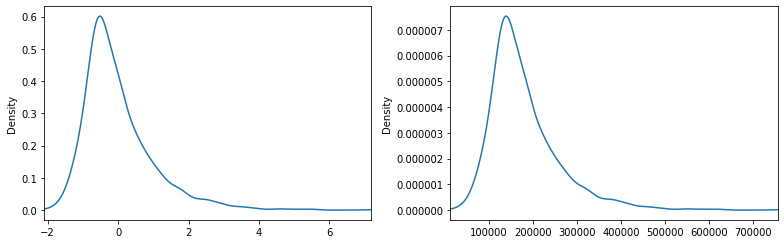

In [20]:
plt.figure(figsize = (11,3.5))
plt.subplot(1,2,1)
houses['z_prices'].plot.kde(xlim = (houses['z_prices'].min(),houses['z_prices'].max()))

plt.subplot(1,2,2)
houses['SalePrice'].plot.kde(xlim = (houses['SalePrice'].min(),houses['SalePrice'].max()))

plt.tight_layout() # otherwise the plots will overlay partially
plt.show()

Notice that the shape of the initial distribution is preserved perfectly in the new distribution of z-scores.

In [13]:
z_mean_price = houses['z_prices'].mean()
z_stdev_price = houses['z_prices'].std(ddof = 0)

print(z_mean_price)
print(z_stdev_price)

-1.1429992333726227e-16
1.0000000000000002


In [14]:
mean_area = houses['Lot Area'].mean()
stdev_area = houses['Lot Area'].std(ddof = 0)
houses['z_area'] = houses['Lot Area'].apply(
    lambda x: ((x - mean_area) / stdev_area)
    )

z_mean_area = houses['z_area'].mean()
z_stdev_area = houses['z_area'].std(ddof = 0)

print(z_mean_area)
print(z_stdev_area)

8.771898641662927e-18
0.9999999999999997


The mean values are both extremely close to `0`. 
* For instance, we got a mean of `-1.1429992333726227e-16` (notice the `e-16` at the end) for the z-scores distribution of the SalePrice column. This number uses scientific notation to abbreviate what in full would be `-0.0000000000000001429992333726227`. 

Also, both the standard deviations were also very close to `1`: `1.0000000000000002` and `0.9999999999999997`.

In fact, for every distribution of z-scores, the mean is always 0 and the standard deviation is always 1. We got slightly different values because of small rounding errors.

Consider the transformation of a normally-distributed population of sale prices with mean 180000 and standard deviation 10000:

Notice that when we transform to z-scores, the initial values are practically relabeled and the relative location of each value in the distribution is perfectly preserved. This explains why the shape of the original distribution is preserved, and it also means that the location of the mean and the standard deviation is preserved as well.

The mean is located at 180000 in the initial distribution. In the z-score distribution, the mean has the same location, but now there's a value of 0 at that location because the z-score of 180000 is 0.

Notice that the value of the standard deviation (`10000`) is given by the difference between the value that is **one standard deviation above the mean (190000)** and **the mean (180000)**: `190000-180000=10000`. 

After converting 190000 and 180000 to z-scores, the difference becomes `1-0 = 1`, so the standard deviation of the z-score distribution is `1`.

A distribution of z-scores is often called a **standard distribution** (remember that z-scores are also called **standard scores**). When we convert a distribution to z-scores, we'd say in statistical jargon that we **standardized** the distribution.

In [15]:
population = [0,8,0,8]

# Standardize the population of values stored in the population variable and compute its mean  and its standard deviation 
import numpy as np

mean_pop = np.mean(population)
std_pop = np.std(population, ddof = 0)

standardized_pop = [(i-mean_pop)/std_pop for i in population]
standardized_pop

[-1.0, 1.0, -1.0, 1.0]

In [16]:
mean_z = np.mean(standardized_pop)
stdev_z = np.std(standardized_pop, ddof = 0)

print(mean_z)
print(stdev_z)

0.0
1.0


In [17]:
# instead treat population as a sample and proceed to standardize it
sample = [0,8,0,8]

x_bar = np.mean(sample)
s = np.std(sample, ddof = 1)

standardized_sample  =  [(i-x_bar)/s for i in sample]
standardized_sample

[-0.8660254037844387,
 0.8660254037844387,
 -0.8660254037844387,
 0.8660254037844387]

In [18]:
print(np.mean(standardized_sample))
print(np.std(standardized_sample, ddof = 1))

0.0
1.0


Standardizing distributions can prove very useful when we need to compare values coming from different systems of measurement.

Formula for finding a z-score in a population is `𝑧=(𝑥−μ)/б`
* With a little algebra we can show that `x = zб + μ`

We already have the values for **z**, but what about `μ` and `б`? We are actually free to choose any values we want for `μ` and `б`. 

for example we can `μ = 50` and `б = 10`

Each z-score in the distribution will follow the same procedure — it'll be multiplied by `10` and then we'll add `50` to the result of the product. This means that the location of each z-score will be preserved perfectly — it's all a matter of relabeling.